In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [7]:
# Define the functions that build and train the model

def create_model(my_learning_rate, my_feature_layer):
    # Simple tf.keras.Sequential. Will try out more complex models in the future.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

    # Describe the topography of the model by calling the tf.keras.layers.Dense()

    # Define the first hidden layer with 20 nodes.
    model.add(tf.keras.layers.Dense(units=20,
                                    activation='relu',
                                    name='Hidden1'))

    # Define the second hidden layer with 12 nodes.
    model.add(tf.keras.layers.Dense(units=12,
                                    activation='relu',
                                    name='Hidden2'))

    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    name='Output'))

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.MeanSquaredError()])

    return model


def train_model(model, dataset, epochs, label_name,
                batch_size=None):
    
    # Split the dataset into features and label.
    # Didn't fully understand this next line yet (copy pasted it) and it causes some problems. Will try to find out a better way to do it.
    features = {name: np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True)

    epochs = history.epoch

    # Gather a snapshot of the model's mean squared error at each epoch.
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse


# Define the plotting function for the loss curves

def plot_the_loss_curve(epochs, mae_training):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.legend()

    merged_mae_lists = mae_training[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()

    
# Define the analytical solution for the bending problem

def ana_sol(x):
    y = np.zeros(len(x))
    for i in range(0, len(x) - 1):
        y[i] = -x[i]**5 + 2*x[i]**4   # Will put here the equations for
               #the deflection of the beam. Will also be a function of q, E, I and l.

    return y




In [26]:

# Create fictional points

x_min = -25
x_max = 25
n = 1000  # number of points
x_vec = np.linspace(x_min, x_max, n)
y_vec = ana_sol(x_vec)

# Add noise
noise_factor = 0.1
y_vec = y_vec + noise_factor * (np.random.random(len(y_vec)) - 0.5) * (np.max(y_vec) - np.min(y_vec))

points = np.zeros((len(x_vec), 2))

for i in range(len(x_vec)):
    points[i, 0] = x_vec[i]
    points[i, 1] = y_vec[i]

# Create a Pandas Data Frame with the points. Still need to find out if this is necessary in this case.
df = pd.DataFrame(points, columns=['x_vec', 'y_vec'])
df = df.reindex(np.random.permutation(df.index))  # shuffle the points


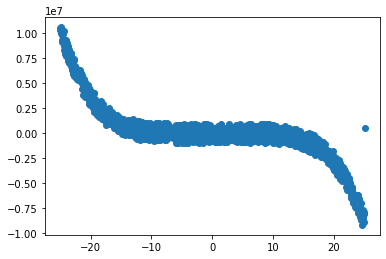

In [32]:
plt.scatter(x_vec,y_vec)

In [42]:

# Append x_vec to feature columns. 
feature_columns = []
x_col = tf.feature_column.numeric_column("x_vec")
feature_columns.append(x_col)

# Convert the list of feature columns into a layer
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Tune the hyperparameters of the model
learning_rate = 0.2
epochs = 300
batch_size = 100

# Specify the label
label_name = "y_vec"

# Create the model
my_model = create_model(learning_rate, my_feature_layer)



ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [44]:
# Train the model on the x_vec
epochs, mse = train_model(my_model, df, epochs,
                          label_name, batch_size)

Train on 1000 samples
Epoch 1/300
1000/1000 [==============================] - 1s 635us/sample - loss: 8952039971225.5996 - mean_squared_error: 8952040390656.0000
Epoch 2/300
1000/1000 [==============================] - 0s 25us/sample - loss: 8911068436889.5996 - mean_squared_error: 8911067283456.0000
Epoch 3/300
1000/1000 [==============================] - 0s 26us/sample - loss: 8729349062656.0000 - mean_squared_error: 8729348538368.0000
Epoch 4/300
1000/1000 [==============================] - 0s 24us/sample - loss: 8249273902694.4004 - mean_squared_error: 8249274269696.0000
Epoch 5/300
1000/1000 [==============================] - 0s 28us/sample - loss: 7290865215078.4004 - mean_squared_error: 7290865319936.0000
Epoch 6/300
1000/1000 [==============================] - 0s 26us/sample - loss: 6037026950348.7998 - mean_squared_error: 6037026897920.0000
Epoch 7/300
1000/1000 [==============================] - 0s 26us/sample - loss: 5131639586816.0000 - mean_squared_error: 5131638669312.00

1000/1000 [==============================] - 0s 22us/sample - loss: 2142442645094.3999 - mean_squared_error: 2142442881024.0000
Epoch 60/300
1000/1000 [==============================] - 0s 21us/sample - loss: 2103764831436.8000 - mean_squared_error: 2103764844544.0000
Epoch 61/300
1000/1000 [==============================] - 0s 22us/sample - loss: 2067639487692.8000 - mean_squared_error: 2067639435264.0000
Epoch 62/300
1000/1000 [==============================] - 0s 22us/sample - loss: 2042836431667.2000 - mean_squared_error: 2042836549632.0000
Epoch 63/300
1000/1000 [==============================] - 0s 21us/sample - loss: 2008702504140.8000 - mean_squared_error: 2008702517248.0000
Epoch 64/300
1000/1000 [==============================] - 0s 20us/sample - loss: 1979728330752.0000 - mean_squared_error: 1979728396288.0000
Epoch 65/300
1000/1000 [==============================] - 0s 23us/sample - loss: 1939181600768.0000 - mean_squared_error: 1939181404160.0000
Epoch 66/300
1000/1000 [==

1000/1000 [==============================] - 0s 24us/sample - loss: 714937748684.8000 - mean_squared_error: 714937794560.0000
Epoch 118/300
1000/1000 [==============================] - 0s 23us/sample - loss: 700867641344.0000 - mean_squared_error: 700867608576.0000
Epoch 119/300
1000/1000 [==============================] - 0s 24us/sample - loss: 707102762598.4000 - mean_squared_error: 707102769152.0000
Epoch 120/300
1000/1000 [==============================] - 0s 22us/sample - loss: 686220879462.4000 - mean_squared_error: 686220902400.0000
Epoch 121/300
1000/1000 [==============================] - 0s 24us/sample - loss: 665195433164.8000 - mean_squared_error: 665195380736.0000
Epoch 122/300
1000/1000 [==============================] - 0s 25us/sample - loss: 673635588505.6000 - mean_squared_error: 673635565568.0000
Epoch 123/300
1000/1000 [==============================] - 0s 24us/sample - loss: 645036808601.6000 - mean_squared_error: 645036769280.0000
Epoch 124/300
1000/1000 [=========

1000/1000 [==============================] - 0s 25us/sample - loss: 455619818291.2000 - mean_squared_error: 455619837952.0000
Epoch 176/300
1000/1000 [==============================] - 0s 24us/sample - loss: 446892847923.2000 - mean_squared_error: 446892834816.0000
Epoch 177/300
1000/1000 [==============================] - 0s 27us/sample - loss: 454143410176.0000 - mean_squared_error: 454143442944.0000
Epoch 178/300
1000/1000 [==============================] - 0s 25us/sample - loss: 432482700492.8000 - mean_squared_error: 432482746368.0000
Epoch 179/300
1000/1000 [==============================] - 0s 24us/sample - loss: 451016812134.4000 - mean_squared_error: 451016753152.0000
Epoch 180/300
1000/1000 [==============================] - 0s 25us/sample - loss: 454468472012.8000 - mean_squared_error: 454468501504.0000
Epoch 181/300
1000/1000 [==============================] - 0s 23us/sample - loss: 448643543859.2000 - mean_squared_error: 448643563520.0000
Epoch 182/300
1000/1000 [=========

1000/1000 [==============================] - 0s 20us/sample - loss: 408284615475.2000 - mean_squared_error: 408284594176.0000
Epoch 234/300
1000/1000 [==============================] - 0s 25us/sample - loss: 408421413683.2000 - mean_squared_error: 408421400576.0000
Epoch 235/300
1000/1000 [==============================] - 0s 26us/sample - loss: 409604417126.4000 - mean_squared_error: 409604423680.0000
Epoch 236/300
1000/1000 [==============================] - 0s 24us/sample - loss: 414821898649.6000 - mean_squared_error: 414821875712.0000
Epoch 237/300
1000/1000 [==============================] - 0s 24us/sample - loss: 418793904537.6000 - mean_squared_error: 418793947136.0000
Epoch 238/300
1000/1000 [==============================] - 0s 24us/sample - loss: 419507204915.2000 - mean_squared_error: 419507240960.0000
Epoch 239/300
1000/1000 [==============================] - 0s 22us/sample - loss: 405054839193.6000 - mean_squared_error: 405054881792.0000
Epoch 240/300
1000/1000 [=========

1000/1000 [==============================] - 0s 20us/sample - loss: 413687087104.0000 - mean_squared_error: 413687054336.0000
Epoch 292/300
1000/1000 [==============================] - 0s 21us/sample - loss: 400796146073.6000 - mean_squared_error: 400796155904.0000
Epoch 293/300
1000/1000 [==============================] - 0s 23us/sample - loss: 403649599897.6000 - mean_squared_error: 403649626112.0000
Epoch 294/300
1000/1000 [==============================] - 0s 22us/sample - loss: 403884536627.2000 - mean_squared_error: 403884539904.0000
Epoch 295/300
1000/1000 [==============================] - 0s 21us/sample - loss: 407208053964.8000 - mean_squared_error: 407208034304.0000
Epoch 296/300
1000/1000 [==============================] - 0s 22us/sample - loss: 397258760192.0000 - mean_squared_error: 397258752000.0000
Epoch 297/300
1000/1000 [==============================] - 0s 23us/sample - loss: 402367646924.8000 - mean_squared_error: 402367643648.0000
Epoch 298/300
1000/1000 [=========

In [45]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_3 (DenseFeatu multiple                  0         
_________________________________________________________________
Hidden1 (Dense)              multiple                  40        
_________________________________________________________________
Hidden2 (Dense)              multiple                  252       
_________________________________________________________________
Output (Dense)               multiple                  13        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


8513808531456.0


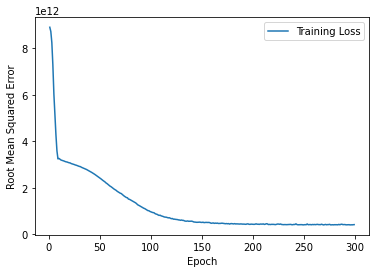

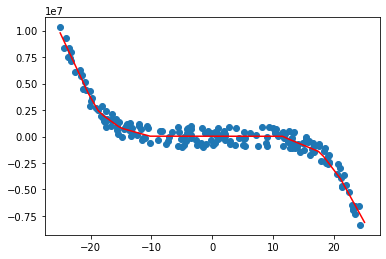

In [46]:

plot_the_loss_curve(epochs, mse)

# Plot a sample of the fictional points and the ML solution curve
sample_df = df.sample(int(n/5))
plt.scatter(sample_df['x_vec'], sample_df['y_vec'])

df['y_vec'] = np.zeros(len(y_vec))  # To make sure my_model.predict isn't using the y_vec values in any way.
# print(df)
# print({name: np.sort(np.array(value)) for name, value in df.items()})

# Had some problems here, because my_model.predict only takes a 'dict' as argument and not a np.array
# Probably related to my problems in the function train_model.
plt.plot(x_vec, my_model.predict({name: np.sort(np.array(value)) for name, value in df.items()}), c='r')
plt.show()

# It now gives a warning because the 'dict' has two inputs, but I can't seem to make it work right yet.




In [38]:
my_model.predict({name: np.sort(np.array(value)) for name, value in df.items()})

array([[ 1.00738500e+07],
       [ 1.00016830e+07],
       [ 9.92951800e+06],
       [ 9.85735000e+06],
       [ 9.78518200e+06],
       [ 9.71301700e+06],
       [ 9.64084900e+06],
       [ 9.56868400e+06],
       [ 9.49651500e+06],
       [ 9.42434700e+06],
       [ 9.35218400e+06],
       [ 9.28001500e+06],
       [ 9.20784700e+06],
       [ 9.13568200e+06],
       [ 9.06351400e+06],
       [ 8.99134600e+06],
       [ 8.91918100e+06],
       [ 8.84701200e+06],
       [ 8.77484500e+06],
       [ 8.70268000e+06],
       [ 8.63051200e+06],
       [ 8.55834700e+06],
       [ 8.48617900e+06],
       [ 8.41401100e+06],
       [ 8.34184600e+06],
       [ 8.26967750e+06],
       [ 8.19751100e+06],
       [ 8.12534500e+06],
       [ 8.05317800e+06],
       [ 7.98101000e+06],
       [ 7.90884450e+06],
       [ 7.83667650e+06],
       [ 7.76450850e+06],
       [ 7.69234350e+06],
       [ 7.62017600e+06],
       [ 7.54800950e+06],
       [ 7.47584150e+06],
       [ 7.40367400e+06],
       [ 7.3

In [37]:
sample_df.shape

(200, 2)